<h1 align='center'>Global Poverty Analysis Through Data Visualizations</h1>

<h4 align='center'>Mark Lynch & Andres Cifuentes</h4>
<h4 align='center'>Data Visualization</h4>
<h4 align='center'>7/31/2019</h4>

<br><br>
### 1. About The Data:

&emsp; This project utilizes the poverty database, publicly available through the Journal of Statistics Education's website at http://jse.amstat.org/. This database provides 97 samples from both The United Nations Educational, Scientific and Cultural Organization's (U.N.E.S.C.O.) 1990 Demographic Year Book and The Annual Register for 1992. The poverty database compiles statics for countries around the world in the year 1990. For each sample, the dataset provides the following:
 - Country name
 - Live birth rate per 1000 in the population
 - Death rate per 1000 in the population
 - Infant deaths per 1,000 in the population, under 1 year old
 - Life expectancy at birth for males
 - Life expectancy at birth for females
 - Gross national product per capita in U.S. dollars
 - Regional Group:
          1 = Eastern Europe
          2 = South America and Mexico
          3 = Western Europe, North America, Japan, Australia, New Zealand
          4 = Middle East
          5 = Asia
          6 = Africa
 
&emsp; The focus of the analysis below will be to establish a correlation between gross national product per capita and birth rates, death rates, infant mortality, population growth, as well as life expectancy. Due to this focus, five of the 97 samples will be disregarded for this project, as they do not contain gross national product data. This leaves 92 valid samples for analysis, which will prove sufficient, since the remainder of the dataset is complete and accurate. Below is a sample of the dataset structure, for reference.

In [21]:
import pandas
povertydf = pandas.read_csv('poverty.csv')
povertydf[povertydf['gnp'] != '*'].head()

,births,deaths,infant_deaths,female_le,male_le,gnp,country_group,country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary
5,14.3,10.2,16.0,67.2,75.7,1690,1,Poland


<br><br>
### 2. Visualizations:

#### Figure 2.1

In [1]:
# GNP Choropleth 
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Choropleth(autocolorscale = False,
                      colorscale = 'Blues',
                      reversescale = True,
                      locations = povertydf['country'],
                      z = povertydf['gnp'],
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "GNP Per Capita (USD)"))]

layout = go.Layout(title = go.layout.Title(text = 'Distributed Gross National Product Per Capita'),
                   geo = go.layout.Geo(scope = 'world'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Distributed Gross National Product Per Capita")

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.1 is a choropleth map showing the distribution of global wealth, using gross national product as the metric. Here the data variables, country and gross national product, are mapped to the visual variables, position and color, respectively. The map shows the majority of global wealth is concentrated in North America and Europe, while South America, Asia and Africa show strong signs of impoverishment.

<br>

#### Figure 2.2

In [2]:
# GNP Bar Chart
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int

sorteddf = povertydf.sort_values(by = ['gnp'], ascending = False)

data = [go.Bar(y = sorteddf['gnp'],
               x = sorteddf['country'],
               name = 'Gross National Product')]

layout = go.Layout(title = 'Gross National Product By Country',
                   yaxis = go.layout.YAxis(title = 'Gross National Product Per Capita (USD)'),
                   xaxis = go.layout.XAxis(title = 'Country', automargin = True))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Gross National Product By Country')

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.2 further illustrates the distribution of global wealth, using gross national product as the metric. Here the data variables country and gross national product are mapped to x and y axes, respectively. The chart shows the countries with the highest gross national product in descending order to draw contrast between, and better clarify the gap between, Switzerland, as the wealthiest, and Mozambique, as the most impoverished. We can also observe an exponential decrease across the graph, indicating that those nations that are wealthier are substantially so.

<br>

#### Figure 2.3

In [3]:
# GNP Distribution Box Plot
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Box(x = povertydf['gnp'], name = 'GNP Distribution')]

layout = go.Layout(title = 'Gross National Product Distribution',
                   xaxis = go.layout.XAxis(title = 'Gross National Product Per Capita (USD)'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Gross National Product Distribution')

&emsp; Figure 2.3 is a box plot visualizing the distribution of global wealth, using gross national product as the metric. Here the data variable gross national product is mapped to x axis. The plot gives an overall impression of gross national product distribution. Importantly, we can see that the median value is very low, especially when compared to the upper fence. The substantial number of outliers indicates that a select few of the wealthiest countries fall well above the standard deviations and upper fence, producing vast amounts of wealth.

<br>

#### Figure 2.4

In [4]:
# Birth Rate v. Death Rate Box Plot
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Box(y = povertydf['births'],
               name = 'Births Per 1000'),
        go.Box(y = povertydf['deaths'],
               name = 'Deaths per 1000')]

layout = go.Layout(title = 'Distributed Birth and Death Rates')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Distributed Birth and Death Rates")

&emsp; The box plot above (figure 2.4) contrasts global birth rates with global death rates. Here the data variables, birth and death rate per 1000 in the country's population, are both mapped to the y axis and delivered side-by-side. This shows an overall trend of population growth, globally. Note should be taken of the difference in variance between the two plots. Death rate, for instance, does not deviate substantially, but there are outliers. These outliers could be attributed to war, disease or famine in these countries. Birth rate, conversely, varies greatly between countries, indicating significant factors at play.

<br>

#### Figure 2.5

In [5]:
# Population Growth Choropleth
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf['growth'] = (povertydf['births'] - povertydf['deaths']) / 10

growthdf = povertydf[povertydf['growth'] > 0]
declinedf = povertydf[povertydf['growth'] <= 0]

data = [go.Choropleth(name = 'Growth',
                      autocolorscale = False,
                      colorscale = 'Greens',
                      reversescale = True,
                      locations = growthdf['country'],
                      z = growthdf['growth'],
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "% Growth")),
        go.Choropleth(name = 'Decline',
                      autocolorscale = False,
                      colorscale = 'Reds',
                      reversescale = True,
                      locations = declinedf['country'],
                      z = declinedf['growth'],
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "% Decline",
                                                        x = 1.2))]

layout = go.Layout(title = go.layout.Title(text = 'Annual Population Growth'),
                   geo = go.layout.Geo(scope = 'world'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "Annual Population Growth")

&emsp; This choropleth map (figure 2.5) graphically shows the distribution of global population growth using position and green and red color scales. This choropleth is nearly an exact negative image of figure 2.1, signaling that increased GNP and wealth leads to slower birth rates. Meanwhile, the most impoverished nations find themselves on the higher end of that distribution. Only one country on the graph shows population decline, Hungary. This is likely attributed to the nation’s struggled transition away from communist rule, and the ensuing violence and poverty.

<br>

#### Figure 2.6

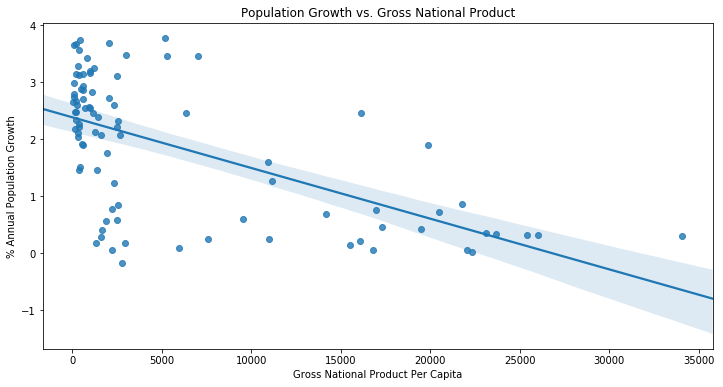

In [7]:
# GNP vs Population Growth Regression Plot
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['growth'] = (povertydf['births'] - povertydf['deaths']) / 10

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'gnp', y = 'growth',data = povertydf)
vis.set(xlabel = 'Gross National Product Per Capita',
        ylabel = '% Annual Population Growth',
        title = 'Population Growth vs. Gross National Product')
plt.show()

&emsp; Figure 2.6 is a seaborn regression plot mapping gross national product and population growth to the x and y axes, respectively. This graph establishes a general correlative relationship between annual population growth and gross national product per capita. As gross national product rises, population growth declines.

<br>

#### Figure 2.7

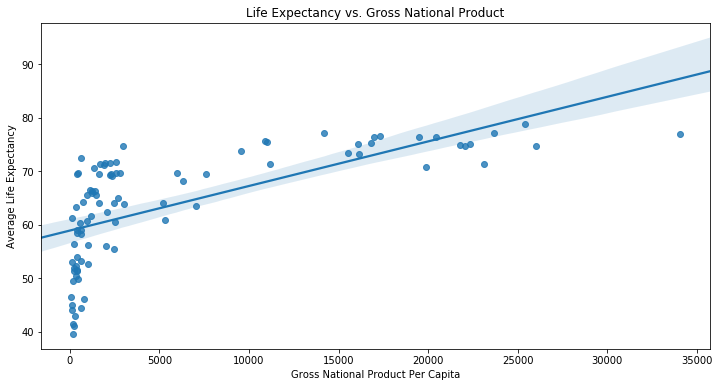

In [12]:
# GNP vs Average Life Expectancy Regression Plot
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['avg_le'] = (povertydf['male_le'] + povertydf['female_le']) / 2

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'gnp', y = 'avg_le', data = povertydf)
vis.set(xlabel='Gross National Product Per Capita',
        ylabel='Average Life Expectancy',
        title = 'Life Expectancy vs. Gross National Product')
plt.show()

&emsp; Figure 2.7 is a seaborn regression plot mapping gross national product and average life expectancy to the x and y axes, respectively. Average life expectancy was calculated by averaging the male life expectancy and female life expectancy metrics for each nation. This graph establishes a general correlative relationship between average life expectancy and gross national product per capita. As gross national product rises, average life expectancy does as well. Although, It does plateau noticeably, indicating a limit on life expectancy or GNP's effectiveness at raising it.

<br>

#### Figure 2.8

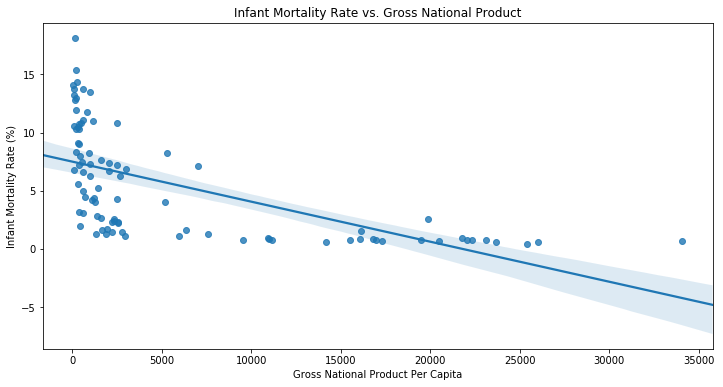

In [8]:
# GNP vs Infant Mortality Rate Regression Plot
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['infant_deaths'] = povertydf['infant_deaths'] / 10

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'gnp', y = 'infant_deaths', data = povertydf)
vis.set(xlabel='Gross National Product Per Capita',
        ylabel='Infant Mortality Rate (%)',
        title = 'Infant Mortality Rate vs. Gross National Product')
plt.show()

&emsp; Figure 2.8 is a seaborn regression plot mapping gross national product and infant mortality rate to the x and y axes, respectively. This graph establishes a general correlative relationship between infant mortality rate and gross national product per capita. As gross national product rises, infant mortality declines. This is likely due to better healthcare and more available access to it.

<br>

#### Figure 2.9

In [11]:
# Birth rate / Death rate  Bar Chart = Population Growth by Country
import pandas 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

povertydf = pandas.read_csv('poverty-R.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values



fig = go.Figure()
groups = []

#sort by country group
for group, group_df in povertydf.groupby('country_group'):
    groups.append(group)
    fig.add_bar(x=group_df.country,
                y=group_df.births,
                name=str(group)+ " births",
                marker_color = 'blue'),
    fig.add_bar(x=group_df.country,
                y=group_df.deaths,
                name=str(group) + " deaths",
                marker_color = 'orange')
#dropdown buttons
fig.layout.update(
    updatemenus=[
        go.layout.Updatemenu(
        active=0,
        buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Birth and Death Comparison",}]),
                dict(label="Births",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Birth Comparison",}]),
                dict(label="Deaths",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Death Comparison",}]),       
            ]),
        )
    ])
fig.layout.update(title = 'Birth and Death Comparison',
                  xaxis = go.layout.XAxis(title = 'Countries'),
                  yaxis = go.layout.YAxis(title = 'Population per 1000'))

py.iplot(fig)

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.9 illustrates the comparison of birth and death rates between each of the countries in 1990. The countries are separated by regions and based on the graph the African region has the biggest birth and death rate compared to the other regions. Analyzing each region, the C. & S. American region had the one of the most notable outliers. Bolivia had the highest birth population and Mexico had the highest death population within its region.    Figure 2.9 illustrates the comparison of birth and death rates between each of the countries in 1990. Within the legend  there is a list of the regions that can be interacted with to selectivly. 

<br>

#### Figure 2.10

In [12]:
# Male vs female life expectancy by region/country/Global
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty-R.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

fig =go.Figure()
fig.add_box(x = list(povertydf.country_group),
    y = povertydf['male_le'],
               name = 'Male',
           marker_color = 'blue'),
fig.add_box(x = povertydf.country_group,
            y = povertydf['female_le'],
               name = 'Female',
           marker_color = 'pink')
fig.layout.update(
    updatemenus=[
go.layout.Updatemenu(
        active=0,
        buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Male & Female Life Expectancy",}]),
                dict(label="Males",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Male Life Expectancy",}]),
                dict(label="Females",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Female Life Expectancy",}]),       
            ]),
        )
    ])
fig.layout.update(title= "Male & Female Life Expectancy",
                  xaxis = go.layout.XAxis(title = 'Regions'),
                  yaxis = go.layout.YAxis(title = 'Age(Year)'))
py.iplot(fig)

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.10 illustrates the Life expectancy between males and females in each region. Based on the graph, all but one region didn’t have their box chart overlapping, the African Region, which had the males having a higher life expectancy then females. The Asian Region had the biggest plot compared to other regions, which shows that the life expectancy in that region was rather scattered. W. Euro, N.A. & Pacific had one of the smallest boxes and highest life expectancy.

<br>

#### Figure 2.11


In [13]:
# Scatter plots: GNP vs death rate, birth rate
import pandas 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
sorteddf = povertydf.sort_values(by = ['births'], ascending = False)

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=sorteddf.gnp,
                y=sorteddf.births,
                mode ='markers',
               name = 'Births',
               hovertext =sorteddf.country,
                marker =dict(
                    color = 'blue',
                symbol ='triangle-up')
)),
fig.add_trace(
    go.Scatter(x=sorteddf.gnp,
                y=sorteddf.deaths,
                mode='markers',
                name= 'Deaths',
               hovertext =sorteddf.country,
                  marker =dict(
                    color = 'orange',
                symbol ='x')
))

    
fig.layout.update(   annotations=[
        go.layout.Annotation(
            x=21790,
            y=16.7,
            xref="x",
            yref="y",
            text="U.S.A.",
            showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=16,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="grey",
            ax=20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="green",
            opacity=0.8
        )
    ],
     updatemenus=[
        go.layout.Updatemenu(
        active=0,
        buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Birth and Death Comparison",}]),
                dict(label="Births",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Birth Comparison",}]),
                dict(label="Deaths",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Death Comparison",}]),       
            ]),
        )
    ],


                  title = 'Gross National Products Vs. Birth & Death Rates',
                  xaxis = go.layout.XAxis(title = 'Gross National Products (USD)'),
                  yaxis = go.layout.YAxis(title = 'Population per 1000'))
py.iplot(fig)

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.11 illustrates countries gross national products (gnp) between birth and death rates. From the graph, each dot represents a country and majority of them are all clustered towards a gnp of under 5k. The graph shows that countries with low gnp have a higher birth rates then one with higher gnp, the same is shown as well with death rates.  The dot for U.S.A. is a good example of the vast difference of birth and death rate, when gnp is above 20k.

<br>

#### Figure 2.12

In [14]:
# Avg Life Expectancy Choropleth

import pandas
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values

data = [go.Choropleth(autocolorscale = False,
                      colorscale = 'Viridis',
                      reversescale = False,
                      locations = povertydf['country'],
                      z = (np.around(povertydf['male_le'] + povertydf['female_le']) / 2),
                      locationmode = 'country names',
                      colorbar = go.choropleth.ColorBar(title = "Age (Year)"))]

layout = go.Layout(title = go.layout.Title(text = 'Life Expectancy within Regions'),
                   geo = go.layout.Geo(scope = 'world'))

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, show_link = False)

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.12 is a choropleth of the average life expectancy of each country. The average life expectancy was calculated from both the male and female life expectancy. The map shows that countries known to have stable economy tend to have a higher life expectancy then countries who don’t. On that basis, many of the countries located in the southern part of Africa struggle to get into the high 50’s.

<br>

#### Figure 2.13

In [15]:
import pandas
import plotly.plotly as py
import plotly.graph_objs as go

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
sorteddf = povertydf.sort_values(by = ['infant_deaths'], ascending = False)

fig = go.Figure()
fig.add_trace(go.Scatter( y=sorteddf.deaths, fill='tozeroy',
                    name = 'Country Deaths',
                         mode='none', # override default markers+lines
                                        hovertext =sorteddf.country
                    ))
fig.add_trace(go.Scatter( y=sorteddf.infant_deaths, fill='tonexty',
                    name = 'Infants under 1',
                         mode= 'none',
                 hovertext =sorteddf.country))

fig.layout.update(annotations=[
        go.layout.Annotation(
            x=72,
            y=9.1,
            xref="x",
            yref="y",
            text="U.S.A.",
            showarrow=True,
            font=dict(
                family="Courier New, monospace",
                size=16,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="grey",
            ax=20,
            ay=-30,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="black",
            opacity=0.8
        )
    ],
                  title= "Infant Death Rate vs Overall Death Rate",
                  xaxis = go.layout.XAxis(title = "Number of countries"),
                  yaxis = go.layout.YAxis(title = 'Population per 1000'))
py.iplot(fig)

C:\Users\malyn\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



&emsp; Figure 2.13 compares the death rate for infants under one year old and country's overall death rate. The most obvious thing to note in this graph is that there are more infants deaths then the average death toll overall. Towards the end of the line graph is when the average death toll begins to exceed infants death toll. 

<br>

#### Figure 2.14

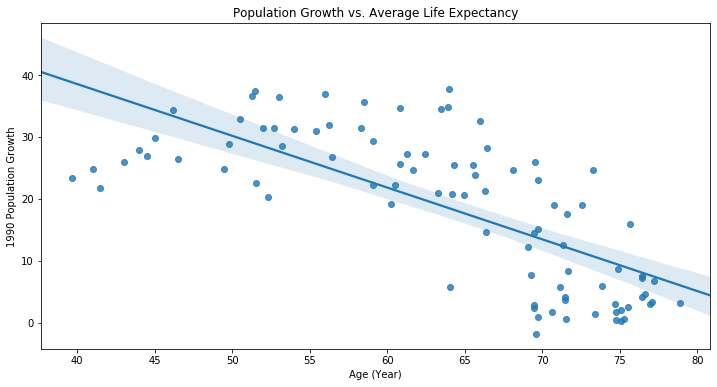

In [12]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

povertydf = pandas.read_csv('poverty.csv')
povertydf = povertydf[povertydf['gnp'] != '*'] #drop missing values
povertydf = povertydf.astype({'gnp': 'int64'}) #GNP from object to int
povertydf['avg_le'] = (povertydf['male_le'] + povertydf['female_le']) / 2
povertydf['growth'] = (povertydf['births'] - povertydf['deaths'])

plt.figure(figsize=(12, 6))
vis = sns.regplot(x = 'avg_le', y = 'growth',data = povertydf)
vis.set(xlabel = 'Age (Year)',
        ylabel = '1990 Population Growth',
        title = 'Population Growth vs. Average Life Expectancy')
plt.show()

&emsp; Figure 2.14 is a linear regression chart that shows population growth between the average life expectancy. The chart show the population growth is on a downward slope as the average life expectancy begins to increase. 

<br><br>
### 3. Conclusion:

&emsp; From this data set and the charts presented, it is evident that poverty has a big impact on the population. Nations shown to have higher gross national product tend to have higher life expectancy, fewer mortality rates, and fewer birth rates. Meanwhile, nations with lower gross national product tend to have lower life expectancy, higher mortality rates and higher birth rates. It seems gross national product can reflect how a nation is equipt in sustaining its population.  Thus, nations in poverty are the ones who suffer the most compared to nations who are economically stable.